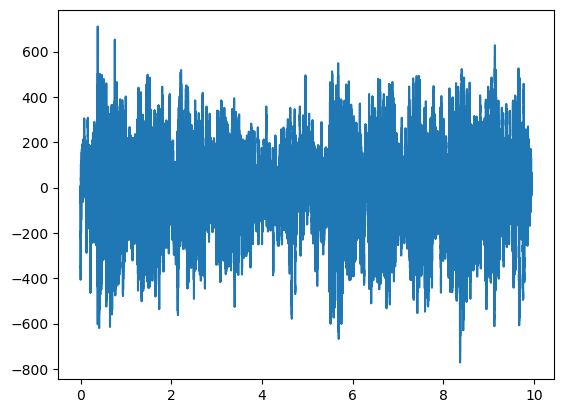

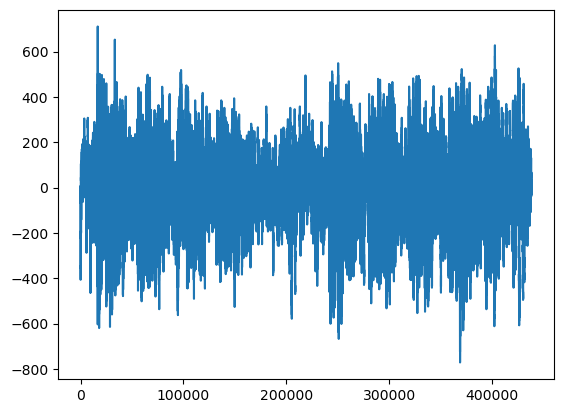

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

x = np.arange(data.shape[0]) / RATE
plt.plot(x, data)
plt.show() # 横軸:時間(sec)
x = [i for i in range(len(data))]
plt.plot(x, data)
plt.show() # 横軸:データ点インデックス


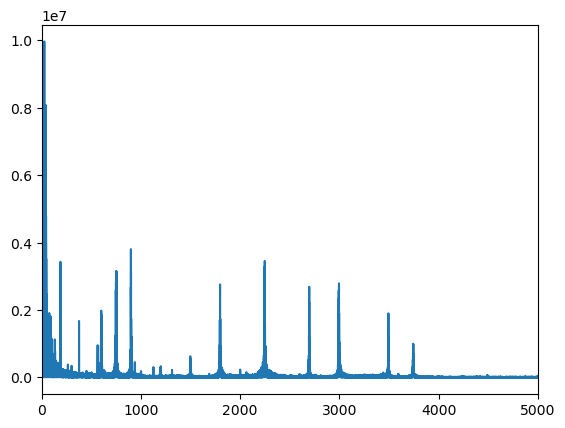

In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


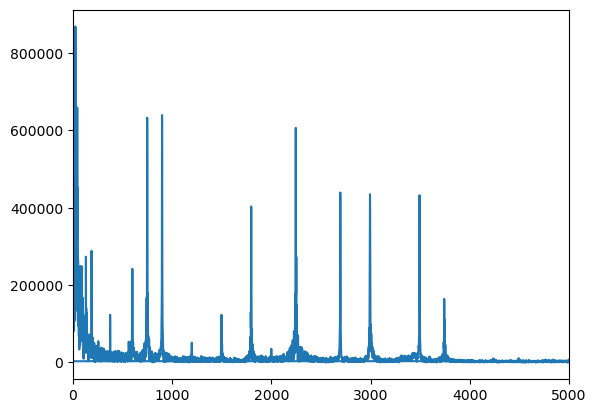

In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 255000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


In [4]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
file_name = "output.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 255000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)

df = pd.DataFrame(dict(freq = freqList, amp = fft_data))
df = df[df['freq']>500] # 500 Hz以下は無視する。
df = df[df['amp']>400000] # 400000以上の強度を持つ点を覚える。
print(list(df.index))
# [694, 695, 696, 697, 833, 834, 835, 1669, 2084, 2085, 2086, 2087, 2503, 2780, 2781, 2782, 3244, 3245]
print(list(df['freq']))
# [747.2021484375, 748.27880859375, 749.35546875, 750.43212890625, 896.85791015625, 897.9345703125, 899.01123046875, 1796.94580078125, 2243.759765625, 2244.83642578125, 2245.9130859375, 2246.98974609375, 2694.88037109375, 2993.115234375, 2994.19189453125, 2995.2685546875, 3492.685546875, 3493.76220703125]
print(len(df))
# 18


[694, 695, 696, 697, 833, 834, 835, 1669, 2084, 2085, 2086, 2087, 2503, 2780, 2781, 2782, 3244, 3245]
[747.2021484375, 748.27880859375, 749.35546875, 750.43212890625, 896.85791015625, 897.9345703125, 899.01123046875, 1796.94580078125, 2243.759765625, 2244.83642578125, 2245.9130859375, 2246.98974609375, 2694.88037109375, 2993.115234375, 2994.19189453125, 2995.2685546875, 3492.685546875, 3493.76220703125]
18


In [5]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
file_name = "output.wav" # 録音ファイル
RATE = 44100 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

# ここに先ほどの結果を入れる
freq_indices = [694, 695, 696, 697, 833, 834, 835, 1669, 2084, 2085, 2086, 2087, 2503, 2780, 2781, 2782, 3244, 3245]

start = 255000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度

amp = 0
for i in freq_indices:
    amp += fft_data[i]

print('{:.2e}'.format(amp))
# 8.88e+06


8.88e+06
